__Sagar Mehta__ <br>
__Arpil Mehta__ <br> 
__Piyush Godbole__  <br>
__Bhoomika Jaggi__  <br>
__Jagdish Pusuluru__

## Part 1: Linear Regression
In this part, we will be working with a dataset scraped by <a href="https://www.kaggle.com/mauryashubham/linear-regression-to-predict-market-value/data">Shubham Maurya</a>, which collects facts about players in the English Premier League as of 2017. His original goal was to establish if there was a relationship between a player's popularity and his market value, as estimated by transfermrkt.com.

**The goal is to fit a model able to predict a player's market value.**

The dataset contains the following information:

| **Field**   |     **Description**      |  
|-------------|-------------|
| name   |  Name of the player | 
| club   |  Club of the player |
| age    | Age of the player |
|position| The usual position on the pitch|
|position_cat| 1 for attackers, 2 for midfielders, 3 for defenders, 4 for goalkeepers|
|market_value| As on transfermrkt.com on July 20th, 2017|
|page_views| Average daily Wikipedia page views from September 1, 2016 to May 1, 2017|
|fpl_value| Value in Fantasy Premier League as on July 20th, 2017|
|fpl_sel| % of FPL players who have selected that player in their team|
|fpl_points| FPL points accumulated over the previous season|
|region| 1 for England, 2 for EU, 3 for Americas, 4 for Rest of World|
|nationality| Player's nationality|
|new_foreign| Whether a new signing from a different league, for 2017/18 (till 20th July)|
|age_cat| a categorical version of the Age feature|
|club_id| a numerical version of the Club feature|
|big_club| Whether one of the Top 6 clubs|
|new_signing| Whether a new signing for 2017/18 (till 20th July)|

**Step 1:** The very first step is to have a deeper look into the data:
1. Using pandas extract a dataframe called *league_df* from the file *football_data.csv* which is inside the folder *data*
2. Print the result of the method  ```name_dataframe.d_types```, in this way you print out the data types associated to each of the fields in the table
3. Run the method ```name_dataframe.head(N)``` to look at first N instances of the dataframe.
4. Use the method ```name_dataframe.describe( )``` to generate descriptive statistics that summarize each field of the dataframe

In [34]:
import numpy as np
np.random.seed(11)

In [35]:
# importing the libraries
import pandas as pd 
import matplotlib.pyplot as plt

In [36]:
# Reading the dataframe
league_df = pd.read_csv("Fantasy_football_data.csv")

In [37]:
league_df.shape

(461, 17)

In [38]:
league_df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [39]:
league_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    object 
 9   fpl_points    461 non-null    int64  
 10  region        460 non-null    float64
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 61.4+ KB


In [40]:
league_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,461.0,26.804772,3.961892,17.00,24.0,27.0,30.0,38.0
position_cat,461.0,2.180043,1.000061,1.00,1.0,2.0,3.0,4.0
market_value,461.0,11.012039,12.257403,0.05,3.0,7.0,15.0,75.0
page_views,461.0,763.776573,931.805757,3.00,220.0,460.0,896.0,7664.0
fpl_value,461.0,5.447939,1.346695,4.00,4.5,5.0,5.5,12.5
fpl_points,461.0,57.314534,53.113811,0.00,5.0,51.0,94.0,264.0
region,460.0,1.993478,0.957689,1.00,1.0,2.0,2.0,4.0
new_foreign,461.0,0.034707,0.183236,0.00,0.0,0.0,0.0,1.0
age_cat,461.0,3.206074,1.279795,1.00,2.0,3.0,4.0,6.0
club_id,461.0,10.334056,5.726475,1.00,6.0,10.0,15.0,20.0


__Checking for players from bigger club__

In [41]:
league_df.big_club.value_counts()

0    321
1    140
Name: big_club, dtype: int64

__Checking for Star players__

In [42]:
condition = league_df[league_df['market_value']>30]
condition.count()

name            30
club            30
age             30
position        30
position_cat    30
market_value    30
page_views      30
fpl_value       30
fpl_sel         30
fpl_points      30
region          30
nationality     30
new_foreign     30
age_cat         30
club_id         30
big_club        30
new_signing     30
dtype: int64

__Checking for missing values__

In [43]:
league_df.isnull().sum()

name            0
club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          1
nationality     0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
dtype: int64

__Exploratory Data Analysis__

Importing the library

In [44]:
import seaborn as sns

__Histogram for players age__

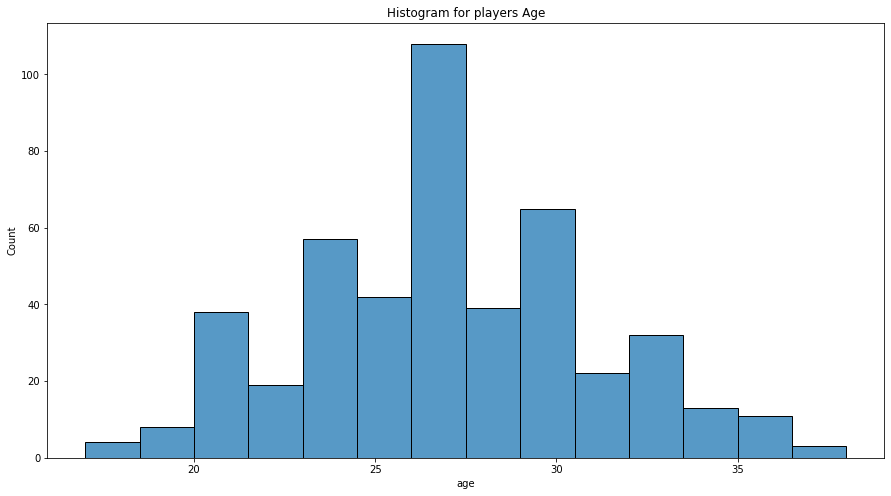

In [45]:
plt.figure(figsize=(15,8))
sns.histplot(x = 'age',data = league_df)
plt.title("Histogram for players Age")
plt.show()

The histogram for player age follows a normal distribution

__Histogram for Market value__

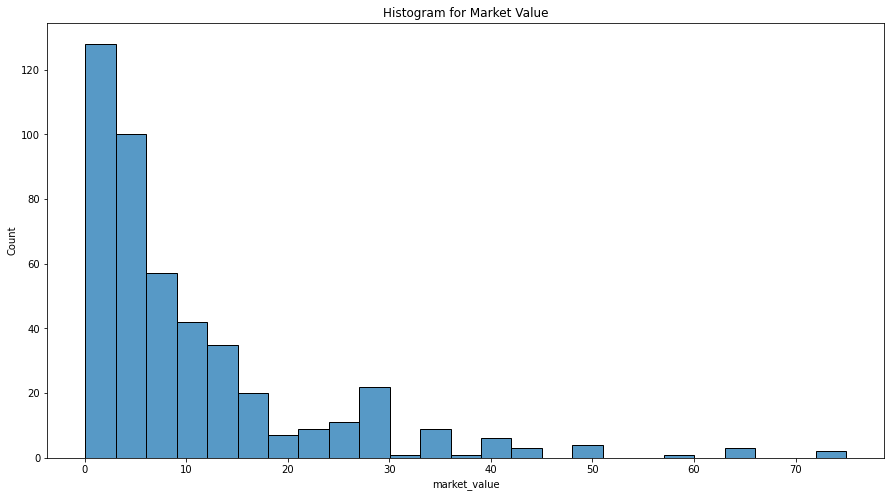

In [46]:
plt.figure(figsize=(15,8))
sns.histplot(x = 'market_value',data = league_df)
plt.title("Histogram for Market Value")
plt.show()

The histogram for market value is right skewed

__Bar chart for players by position__

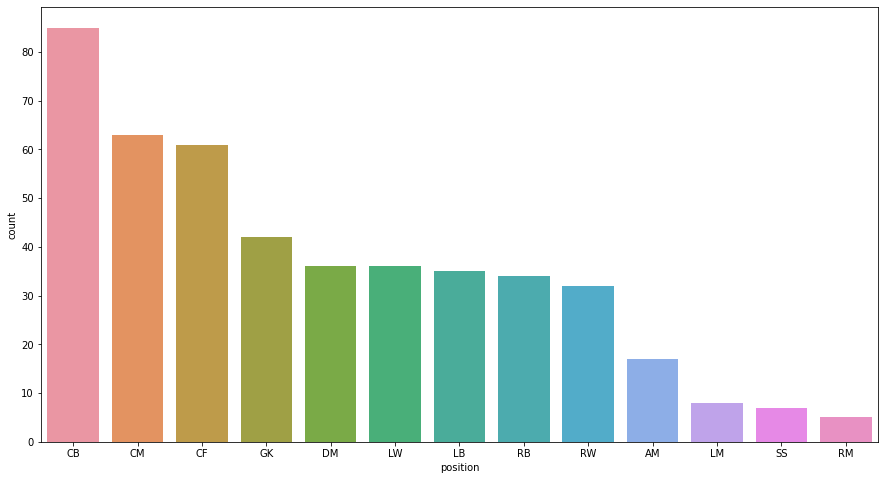

In [47]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'position',data=league_df,order = league_df.position.value_counts().index)
plt.show()

<AxesSubplot:ylabel='position'>

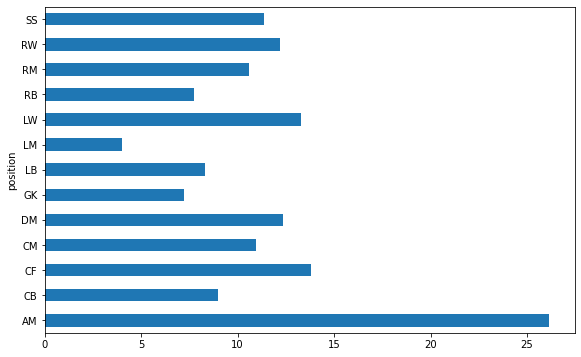

In [48]:
league_df.groupby('position')['market_value'].agg('mean').plot(kind = 'barh')

__Box plot for page views__

<AxesSubplot:>

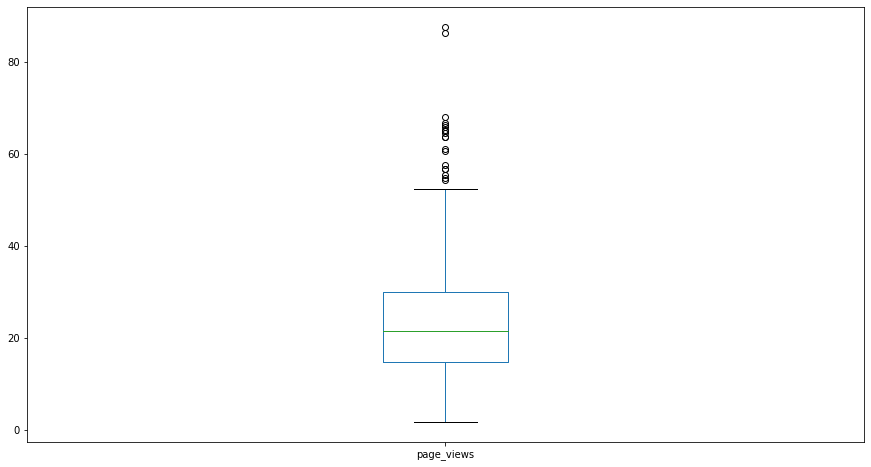

In [49]:
np.sqrt(league_df['page_views']).plot(kind = 'box',figsize=(15,8))

__Box plot for different indepedant variables__

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


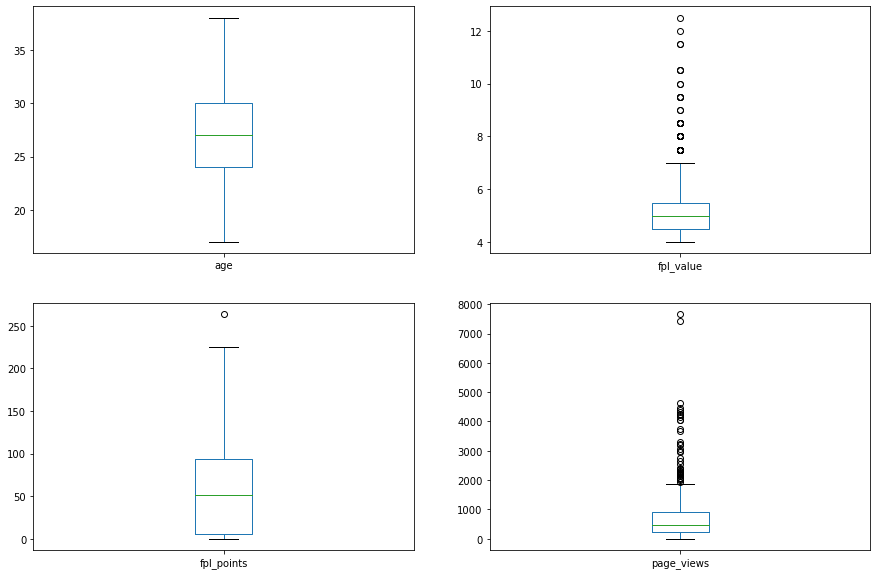

In [50]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
league_df.age.plot(kind = 'box')
plt.subplot(2,2,2)
league_df.fpl_value.plot(kind = 'box')
plt.subplot(2,2,3)
league_df.fpl_points.plot(kind = 'box')
plt.subplot(2,2,4)
league_df.page_views.plot(kind = 'box')
plt.show()

**Step 2 - Prepare the data:**
We split our data into two sets: one data set for training and another one that we will use at the end to test our model.

1. Import the function ```train_test_split``` from ```sklearn.model_selection```
2. Split our *league_df* in **input_df** made of all features except *market_value*, and **output_df** made of the feature *market_value* 
3. Use ```train_test_split``` with a *test_size*=0.25 (25 % of inputs became the test set) in following way to obtain a train set and a test set.

    ```X_train, X_test, y_train, y_test = train_test_split(input_df, output_df, test_size=0.2)```



In [51]:
from sklearn.model_selection import train_test_split #- #Step 1
output_df=league_df['market_value'].copy()# - #Step 2
input_df=league_df.drop(['market_value'],axis=1)

In [52]:

X_train, X_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.25)

The dataset contains a lot of features that can be used to build the model. We will start by using <code>age, fpl_value, big_club</code> and <code>page_views</code>. 

\begin{equation}
 \hat{y} = W_0 + W_1\ x_{age} + W_2\ x_{fplavalue} + W_3\ x_{bigclub} + W_4\ \sqrt{x_{pageviews}}
\end{equation}

We need to use *numpy* library and

<code>from sklearn.preprocessing import PolynomialFeatures<\code>

we define a function called *prepare_data(name_dataframe)* which does the following:
1. extract the above features from the dataframe and assign to a variable
2. apply the *np.sqrt( )* on the values of <code>page_views</code>
3. transform our variable in numpy array <code>np.array(variable)</code>
4. and then add a columns of ones (for the variable of $W_0$) to the dummy variable
5. return our variable
    
We then apply our function to *X_train* and *X_test* to obtain *input_train1* and *input_test1* respectively
Then we create also *output_train* and *output_test* moving to numpy array *y_train1* and *y_test1* respectively. Test data will be used later in the code


In [19]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

def prepare_data(df):
    variable = df[['age', 'fpl_value', 'big_club']].copy()
    variable['sqrt_page_views'] = np.sqrt(df[['page_views']])
    variable_array = np.array(variable)
    variable_array = PolynomialFeatures(1).fit_transform(variable_array)

    return variable_array

input_train1 = prepare_data(X_train)
input_test1 = prepare_data(X_test)
output_train1 = np.array(y_train)
output_test1 = np.array(y_test)

**Step 3 - Training**

Here we define a class called *my_linear_regression* which initializes with *__init__(self)* as empty the properties self.X_train, self.y_train and self.weights. Then we define the method *fit()* of the class which needs as parameters a matrix (X) and an array (y) with the outputs. With those parameters the class initializes self.x_train, self.y_train using the matrix and the array respectively and self.weigths using the formula of the linear regression: $$\hat{W}=(𝑿^𝑇\ 𝑿)^{−1}𝑿^𝑇\ 𝒚$$

We are using the function *np.linalg.solve*($𝑿^𝑇\ 𝑿,𝑿^𝑇\ 𝒚$) to obtain $\hat{W}$ because it is more efficient than matrix inversion and it avoids numerical inestabilities.

The last function in the object *my_linear_regression* is the function *predict()*. Given the weights obtained through fit, this method estimates new y values using the input matrix X_test: 

<code>self.y_hat=np.sum(X*self.weights,axis=1)<\code>

The function also receives an array y with the true y values to compute the mean square error (MSE) using the formula : $$MSE = \dfrac{1}{N}\sum_{i=1}^{N}(y_i -\hat{y}_i)^2$$, where $y_i$ is y_test[i]. 
    
**Implement the MSE.**

In [53]:
class my_linear_regression:
    def __init__(self) : # initialize constructor for the object to assign the object its properties
        self.X_train = []
        self.y_train = []
        self.weights = []
        
    def fit(self, X, y) :
        self.X_train = X
        self.y_train = y
        self.weights = np.linalg.solve(X.T@X,X.T@y)
    
    def predict(self,x_test,y_test) : # method of the object that can be used
        self.y_hat=np.sum(x_test*self.weights,axis=1)
        
        self.MSE= np.square(np.subtract(y_test,self.y_hat)).mean() 
        
        return self.y_hat, self.MSE

__Model 1__

In [21]:
model_1 = my_linear_regression()
k = model_1.fit(input_train1,output_train1)
model_1.y_hat,model_1.MSE = model_1.predict(input_train1,output_train1)

In [22]:
model_1.MSE

43.033709019828834

In [23]:
model_1.weights[0]

-19.11162814882506

In [24]:
model_1.weights[1:]

array([-0.11391484,  4.51149558,  5.17434206,  0.29202352])

__Some observations__

1.As per the estimated weights as the age increases the market values decreases<br> 
2.As the number of page views increase the market values decreases<br> 
3.as the fpl_value increases the market value increases<br> 
4.Fpl_value has the largest effect on the market value of the player.


#### Including polynomial features
A *scatter matrix* is a pair-wise scatter plot of several variables presented in a matrix format. It can be used to determine whether the variables are correlated and whether the correlation is positive or negative.

From the scatter matrix below we can explore the relationship that each "potential" input variable has with the target variable: the market value. 

When looking at the correlation between age and market value (first column, last row), it does not seem to be linear. 

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


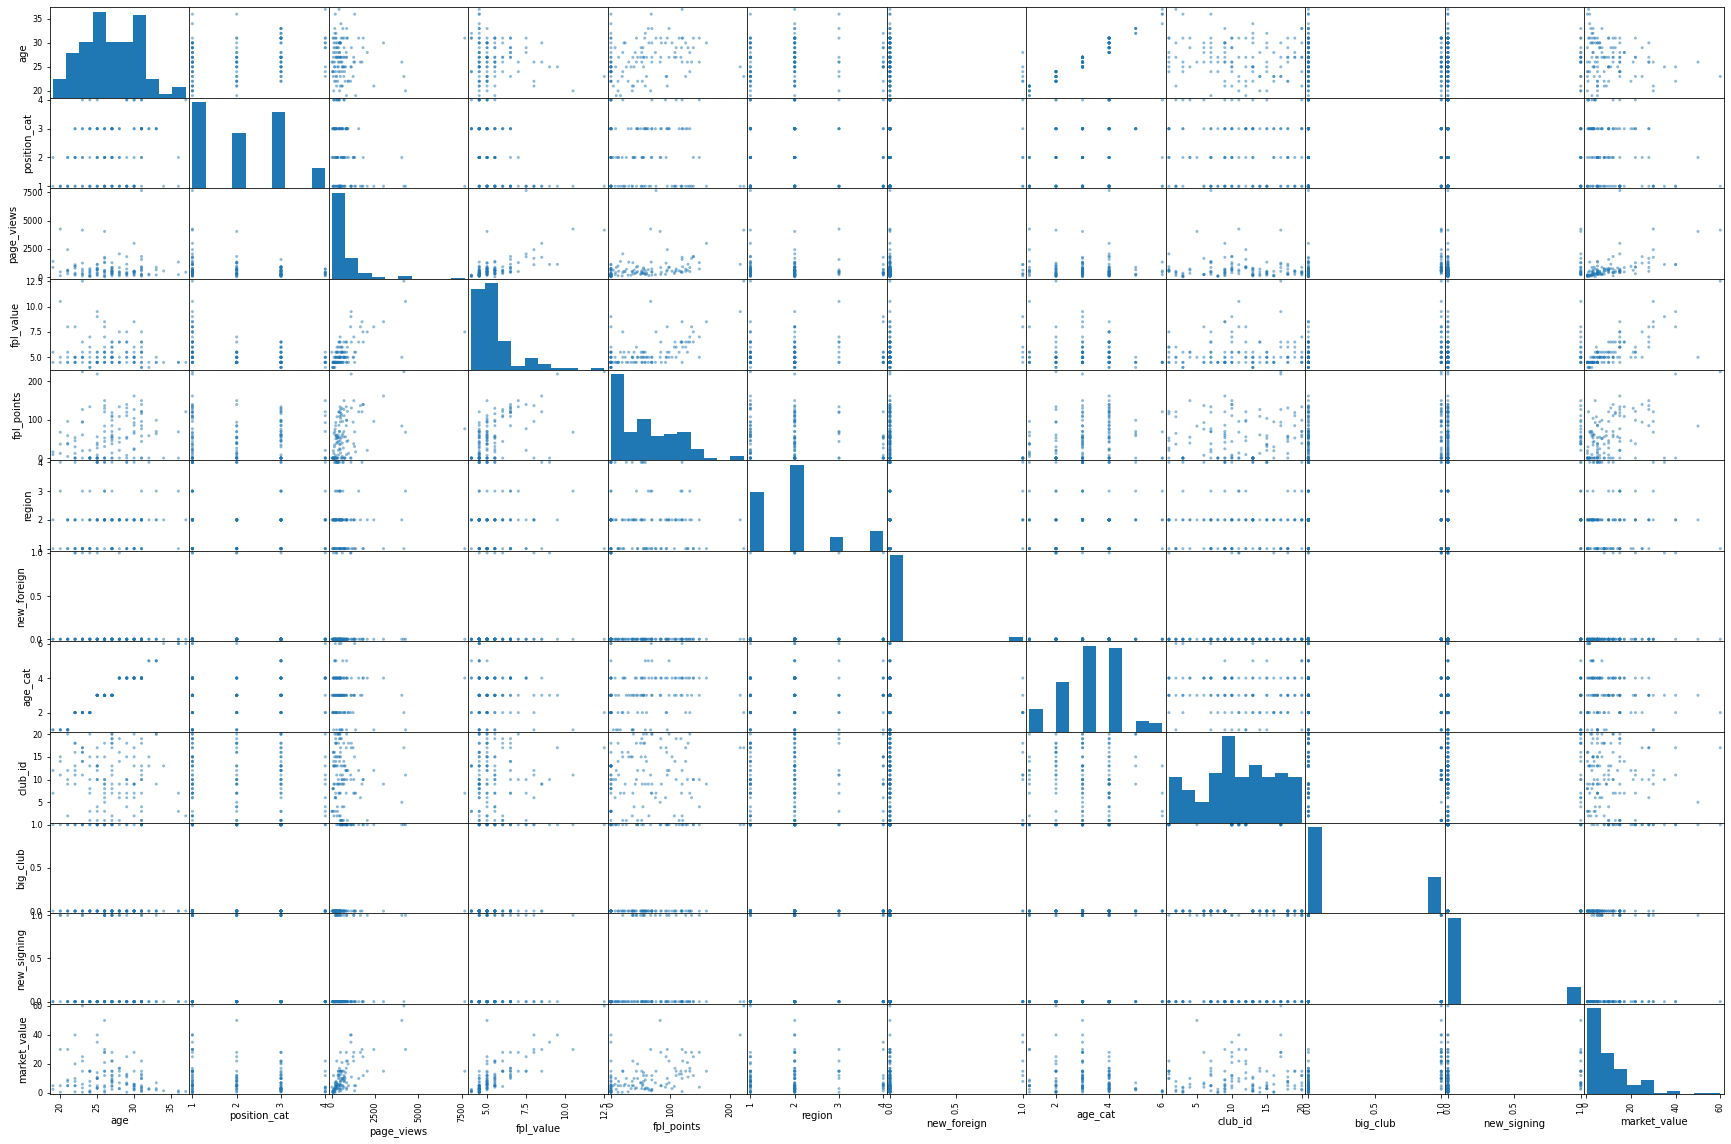

In [54]:
from pandas.plotting import scatter_matrix
to_plot=pd.concat([X_test,y_test],axis=1)
scatter_matrix(to_plot, figsize=(30,20));

In more detail:

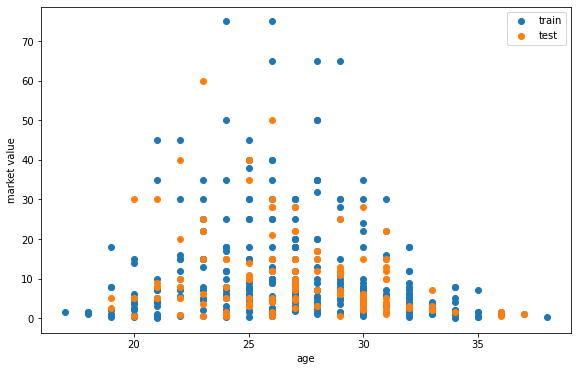

In [55]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [9.5, 6]
plt.scatter(input_train1[:,1], output_train1)
plt.scatter(input_test1[:,1], output_test1)
plt.legend(['train', 'test'])
plt.xlabel('age')
plt.ylabel('market value')
plt.show()

__Model 2__

Let us explore considering a more complex effect of the age by including a quadratic term: 

\begin{equation}
 \hat{y} = w_0 + w_1* x_{age} + w_2* x_{fplvalue} + w_3*x_{bigclub} + w_4*\sqrt{x_{pageviews}} + w_5*x_{age}^2
\end{equation}

The function below prepares the data to fit to this new model.



In [57]:
from sklearn.preprocessing import PolynomialFeatures

def prepare_new_data(df):
    variable1 = df[['age', 'fpl_value', 'big_club']].copy()
    variable1['sqrt_page_views'] = np.sqrt(df[['page_views']])
    variable1['square_age'] = np.square(df[['age']])
    variable_array1 = np.array(variable1)
    variable_array1 = PolynomialFeatures(1).fit_transform(variable_array1)

    return variable_array1

input_train2 = prepare_new_data(X_train)
input_test2 = prepare_new_data(X_test)
output_train2 = np.array(y_train)
output_test2 = np.array(y_test)

In [58]:
model_2 = my_linear_regression()
k2 = model_2.fit(input_train2,output_train2)
model_2.y_hat,model_2.MSE = model_2.predict(input_train2,output_train2)

In [59]:
print(model_2.weights[0])
print(model_2.weights[1:])

-96.59926790780781
[ 5.95534714  3.83273605  5.52299435  0.32873672 -0.11229756]


In [60]:
model_2.MSE

37.85294206603823

Conclusion: As age increases market value decreases

__Model 3__

#### Including categorical features
It is well known that the position where a football player plays has an impact in his market value. Midfielders and stikers tend to be more expensive. *Our goal now is to include this information in the model.*  

As seen from the description, the player position is encoded as a numeric variable (1, 2, 3, 4). However, they represent categories and not values on their own. Categorical variables are commonly encoded under a scheme denoted 1-of-K encoding. This allows to convert a variable representing K different categories into K different binary values. Example: 

| **attacker**   |     **midfielder** | **defender** | **goalkeeper**      |  
|-------------|-------------|-------------|-------------|
| 1   |  0 | 0 | 0 |
| 0   |  1 | 0 | 0 |
| 0   |  0 | 1 | 0 |
| 0   |  0 | 0 | 1 |


**Look carefully below** how to implement 1-of-K encoding so that our model includes information about a player's position
\begin{equation}
 \hat{y} = w_0 + w_1*x_{age} + w_2*x_{fplvalue} + w_3*x_{bigclub} + w_4*x_{pageviews} + w_5*x_{age}^2 + w_6*x_{attaker} + w_7*x_{midfielder} + w_8*x_{defender} +w_9*x_{goalkeeper}
\end{equation}    



In [61]:
def prepare_data_with_position(df):
    variable = df[['age', 'fpl_value', 'big_club']].copy()
    variable['sqrt_page_views'] = np.sqrt(df[['page_views']])
    variable['square_age'] = np.power( df[['age']],2)
    variable=variable.join(pd.get_dummies(df.position_cat, prefix='pos')) # get_dummies to create 1-of-K encoding, join to add the new columns
    variable_array = np.array(variable)
    variable_array = PolynomialFeatures(1).fit_transform(variable_array)
    
    return variable_array

In [62]:
input_train3 = prepare_data_with_position(X_train)
input_test3 = prepare_data_with_position(X_test)
output_train3 = np.array(y_train)
output_test3 = np.array(y_test)

In [63]:
model_3 = my_linear_regression()
k3 = model_3.fit(input_train3,output_train3)
model_3.y_hat,model_3.MSE = model_3.predict(input_train3,output_train3)

In [64]:
print(model_3.weights[0])
print(model_3.weights[1:])

-55.240984751929325
[  5.22348717   5.51839623   3.73696787   0.30460067  -0.10124154
 -42.17661977 -36.10406701 -35.97412564 -34.75413799]


In [65]:
model_3.MSE

32.569639592369484

__Model 4__

\begin{equation}
 \hat{y} = w_0  + w_1*x_{fplvalue} + w_2*x_{bigclub} + w_3*\sqrt{x_{pageviews}} + w_4*x_{attaker} + w_5*x_{midfielder} + w_6*x_{defender} +w_7*x_{goalkeeper}
\end{equation}

In [66]:
def prepare_data_with_position_and_age(df):
    variable = df[['age', 'fpl_value', 'big_club']].copy()
    variable['sqrt_page_views'] = np.sqrt(df[['page_views']])
    variable['square_age'] = np.power( df[['age']],2)
    variable=variable.join(pd.get_dummies(df.position_cat, prefix='pos')) # get_dummies to create 1-of-K encoding, join to add the new columns
    variable=variable.join(pd.get_dummies(df.age_cat))
    variable.drop(['age','square_age'],axis = 1)
    variable_array = np.array(variable)
    variable_array = PolynomialFeatures(1).fit_transform(variable_array)
    
    return variable_array

input_train4 = prepare_data_with_position_and_age(X_train)
input_test4 = prepare_data_with_position_and_age(X_test)
output_train4 = np.array(y_train)
output_test4 = np.array(y_test)

In [67]:
model_4 = my_linear_regression()
k4 = model_4.fit(input_train4,output_train4)
model_4.y_hat,model_4.MSE = model_4.predict(input_train4,output_train4)

In [68]:
print(model_4.weights[0])
print(model_4.weights[1:])

63.76663592492294
[ 2.03814658e+00  5.53375603e+00  3.71588454e+00  3.01876809e-01
 -4.40087817e-02 -2.89681892e+01 -2.27592220e+01 -2.27150076e+01
 -2.13624395e+01 -9.19200566e+01 -8.89603677e+01 -8.81767246e+01
 -8.78533520e+01 -8.95583951e+01 -9.11602627e+01]


In [69]:
model_4.MSE

32.257587947902685

I will consider the model_4 as it has the least MSE

**Step 4 - Prediction:** Now, use the models to predict the market value of the players in the respective test data and print the test error.

All models test MSE

In [70]:
model_1_test = my_linear_regression()
k = model_1_test.fit(input_train1,output_train1)
model_1_test.y_hat,model_1_test.MSE = model_1.predict(input_test1,output_test1)
model_1_test.MSE

36.74870366001146

In [71]:
model_2_test = my_linear_regression()
k2 = model_2_test.fit(input_train2,output_train2)
model_2_test.y_hat,model_2_test.MSE = model_2.predict(input_test2,output_test2)
model_2_test.MSE

33.5048434023512

In [72]:
model_3_test = my_linear_regression()
k3 = model_3_test.fit(input_train3,output_train3)
model_3_test.y_hat,model_3_test.MSE = model_3.predict(input_test3,output_test3)
model_3_test.MSE

34.42512492881001

In [73]:
model_4_test = my_linear_regression()
k4 = model_4_test.fit(input_train4,output_train4)
model_4_test.y_hat,model_4_test.MSE = model_4.predict(input_test4,output_test4)
model_4_test.MSE

35.3870725025981

In [74]:
model_comparison = pd.DataFrame({'Model_no':[1,2,3,4],
                                'Training MSE':[model_1.MSE,model_2.MSE,model_3.MSE,model_4.MSE],
                                'Test MSE':[model_1_test.MSE,model_2_test.MSE,model_3_test.MSE,model_4_test.MSE]})
model_comparison.head()

,Model_no,Training MSE,Test MSE
0,1,36.748704,36.748704
1,2,33.504843,33.504843
2,3,34.425125,34.425125
3,4,35.387073,35.387073


__Conclusion__